In [2]:
cd ..

/Users/johnnyma/Documents/GitHub/MP-Edit


In [3]:
ls output/MNLI/new/

5000_fine-tuned_content-words_gold-label_beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_content-words_gold-label_diverse-beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_content-words_model-label_beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_content-words_model-label_diverse-beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_data-slices_gold-label_beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_data-slices_gold-label_diverse-beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_data-slices_model-label_beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_data-slices_model-label_diverse-beam_mnli_cond_pairs_tagged.csv
categories1.png
cleaned_5000_fine-tuned_content-words_gold-label_beam_mnli_cond_pairs_tagged.csv
cleaned_5000_fine-tuned_content-words_gold-label_diverse-beam_mnli_cond_pairs_tagged.csv
cleaned_5000_fine-tuned_content-words_model-label_beam_mnli_cond_pairs_tagged.csv
cleaned_5000_fine-tuned_content-words_model-label_diverse-beam_mnli_cond_pairs_tagged.csv
cleaned_5000_fine-tuned_data-s

In [4]:
# for mass import
import glob
#combine separate generations quickly
extension = 'csv'
# all_filenames = [i for i in glob.glob('output/MNLI/mturk/'+ '*.{}'.format(extension))]
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

# df = combined_csv


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
plt.rcParams.update({'font.size': 16})

df = pd.read_csv('./output/MNLI/mturk/cleaned_100000_fine-tuned_data-slices_gold-label_beam_MNLI_labeled.csv')
# df = pd.read_csv('./mturk/Pilot_Test_Master_92_3-3-21_labeled.csv')
df.shape

(53236, 28)

In [39]:
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'line-num',
       'pred-model', 'fill-model', 'tokens-masked', 'prepend-model',
       'sampling-strategy', 'premise', 'hypothesis', 'mask-filled',
       'token_changes', 'fill_prob', 'depth', 'Word2Vec-Score', 'Bert-Score',
       'gold-label', 'prepend-label', 'targeted-label', 'orig-label',
       'new-label', 'orig-label-prob', 'same-label-prob', 'new-label-prob',
       'label-changed', 'same-label-prob-diff', 'flip-class'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,line-num,pred-model,fill-model,tokens-masked,prepend-model,sampling-strategy,premise,...,prepend-label,targeted-label,orig-label,new-label,orig-label-prob,same-label-prob,new-label-prob,label-changed,same-label-prob-diff,flip-class
0,3712,3779,3779,7135,RoBERTa-MNLI,fine-tuned,data-slices,gold-label,beam,because of the yeah it's a it's a dry snow it'...,...,neutral,entailment,neutral,neutral,0.55,0.61,0.61,False,0.06,Uncertain-Same
1,22228,22653,22653,41616,RoBERTa-MNLI,fine-tuned,data-slices,gold-label,beam,T&amp;A information must be transmitted to the...,...,neutral,contradiction,neutral,neutral,0.52,0.51,0.51,False,0.01,Uncertain-Same
2,30458,31034,31034,57123,RoBERTa-MNLI,fine-tuned,data-slices,gold-label,beam,"Like all the darned lot of them, he wasn't goi...",...,neutral,entailment,neutral,neutral,0.59,0.62,0.62,False,0.03,Uncertain-Same
3,49962,50931,50931,93643,RoBERTa-MNLI,fine-tuned,data-slices,gold-label,beam,"Such remarks, in any case, are part of Walcott...",...,neutral,contradiction,contradiction,contradiction,0.64,0.53,0.53,False,0.11,Uncertain-Same
4,12642,12875,12875,23756,RoBERTa-MNLI,fine-tuned,data-slices,gold-label,beam,It was neither more nor less than the delibera...,...,contradiction,neutral,contradiction,contradiction,0.82,0.58,0.58,False,0.24,Uncertain-Same


# Visualizing Sentence and Token Similairty Measures

Text(0.5, 1.0, 'Mask Fill Sentence Similarity Measures')

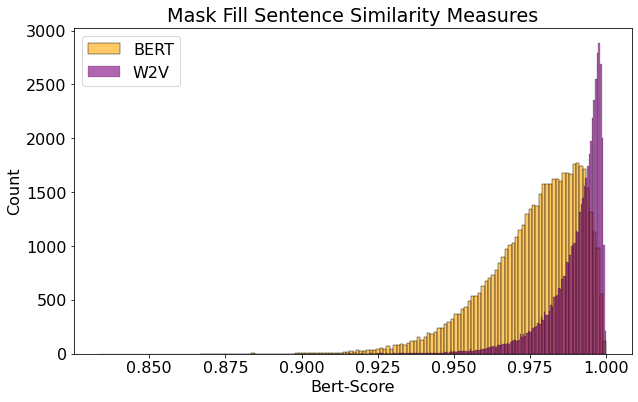

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Bert-Score'], label = 'BERT', alpha = 0.6, color = 'orange')
sns.histplot(df['Word2Vec-Score'], label = 'W2V', alpha=0.6, color = 'purple')
plt.legend()
plt.title('Mask Fill Sentence Similarity Measures')

# plt.figure()
# fig, ax = plt.subplots(figsize=(10,6))
# sns.histplot(df['token-similarity'], label = 'TokSim', alpha=0.6, color = 'red')
# plt.title('Mask Fill Token Similarity Measures')
# plt.xlim([0,1])

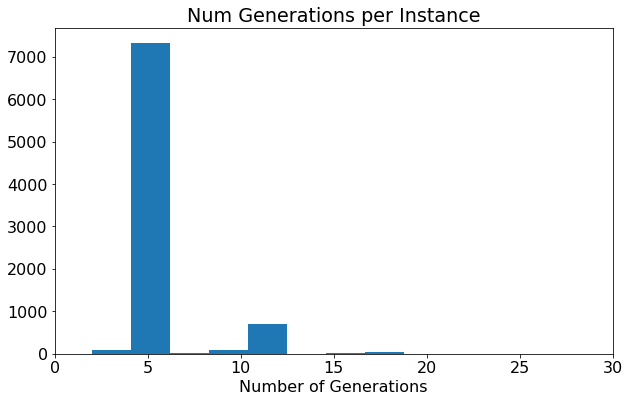

In [41]:
# Visualizing Number of Generations per Data Instance
fig, ax = plt.subplots(figsize=(10,6))
num_gens = df.groupby(df['line-num']).size()
plt.hist(num_gens)
plt.xlim([0,30])
plt.xlabel('Number of Generations')
plt.title('Num Generations per Instance')
plt.savefig('instances1.png', dpi = 300)
plt.show()

# Visualizing Label Flip and Class Probability

Define four conditions based on label flip and probability of label, given by RoBERTA softmax.

1. Certain Flip
2. Uncertain Flip
3. Certain Same
4. Uncertain Same



<AxesSubplot:xlabel='same-label-prob-diff', ylabel='Count'>

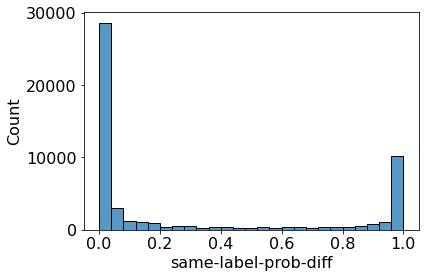

In [42]:
sns.histplot(df['same-label-prob-diff'])

## Subsetting Data into Potential Slices of Interest

(0.0, 1.0)

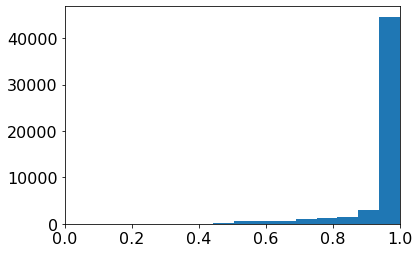

In [43]:
plt.hist(df['orig-label-prob'])
plt.xlim([0,1])

In [44]:
uncertains = df.loc[df['orig-label-prob'] < 0.8] # initial model uncertain
certains = df.loc[df['orig-label-prob'] > 0.8] # initial model certain
# in_slice = df.loc[df['slice'] == 1] # example contains targeted words
# out_slice = df.loc[df['slice'] == 0] # example does not contain targeted words

In [45]:
print(certains.shape)
print(uncertains.shape)

(49188, 28)
(3856, 28)


In [46]:
len(df['line-num'].unique())

8272

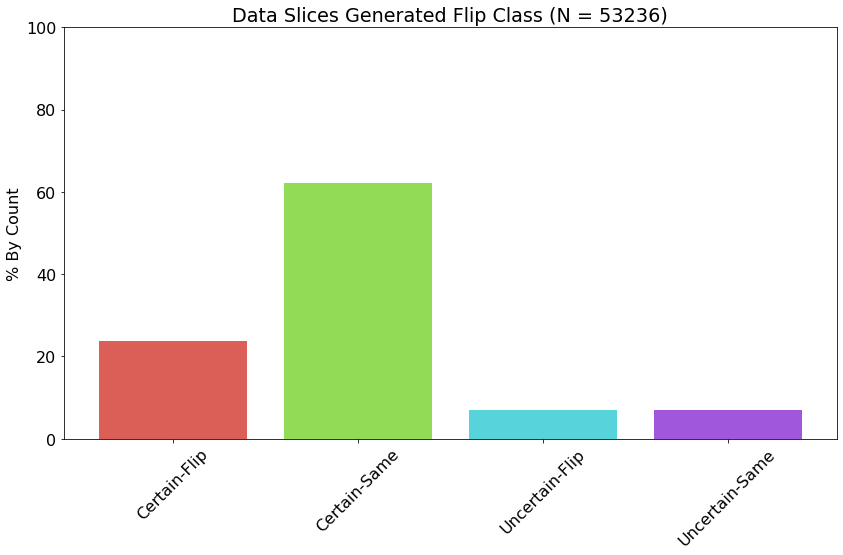

In [47]:
# visualizing flip classes without 

fig, ax1 = plt.subplots(figsize=(12,8))

counts = df['flip-class'].groupby(df['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

ax1.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
ax1.set_xticks(range(4))
ax1.set_xticklabels(counts.index, rotation = 45, ha="center")
ax1.set_ylabel('% By Count')
ax1.set_title(f'Data Slices Generated Flip Class (N = {N})')
ax1.set_ylim([0,100])

plt.tight_layout()
plt.savefig('graphs/data-slices_flipclass.png', dpi = 200)

In [48]:
counts

flip-class
Certain-Flip      23.666316
Certain-Same      62.204148
Uncertain-Flip     7.047862
Uncertain-Same     7.081674
Name: flip-class, dtype: float64

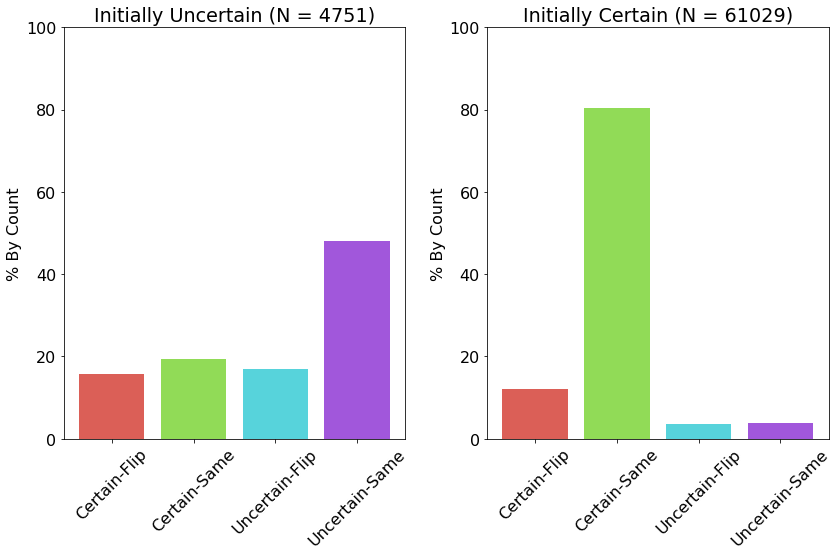

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,8))
ax1, ax2 = axs.ravel()

counts = uncertains['flip-class'].groupby(uncertains['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

ax1.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
ax1.set_xticks(range(4))
ax1.set_xticklabels(counts.index, rotation = 45, ha="center")
ax1.set_ylabel('% By Count')
ax1.set_title(f'Initially Uncertain (N = {N})')
ax1.set_ylim([0,100])

counts = certains['flip-class'].groupby(certains['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

ax2.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
ax2.set_xticks(range(4))
ax2.set_xticklabels(counts.index, rotation = 45, ha="center")
ax2.set_ylabel('% By Count')
ax2.set_title(f'Initially Certain (N = {N})')
ax2.set_ylim([0,100])

# counts = in_slice['flip-class'].groupby(in_slice['flip-class']).size()
# N = sum(counts)
# counts = counts/sum(counts) * 100

# ax3.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
# ax3.set_xticks(range(4))
# ax3.set_xticklabels(counts.index, rotation = 45, ha="center")
# ax3.set_ylabel('% By Count')
# ax3.set_title(f'In Slice (N = {N})')


# counts = out_slice['flip-class'].groupby(out_slice['flip-class']).size()
# N = sum(counts)
# counts = counts/sum(counts) * 100

# ax4.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
# ax4.set_xticks(range(4))
# ax4.set_xticklabels(counts.index, rotation = 45, ha="center")
# ax4.set_ylabel('% By Count')
# ax4.set_title(f'Out Slice (N = {N})')

plt.tight_layout()
plt.savefig('categories1.png', dpi = 300)
plt.show()

In [49]:
# visualizing flip classes in one bar graph

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

width = 0.25       # the width of the bars

# content words
df = pd.read_csv('../output/MNLI/mturk/cleaned_100000_fine-tuned_content-words_gold-label_beam_MNLI_labeled.csv')

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

counts = df['flip-class'].groupby(df['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

types1 = ax.bar(np.arange(len(counts)), counts, width, alpha = 1)

# data slice
df = pd.read_csv('../output/MNLI/mturk/cleaned_100000_fine-tuned_data-slices_gold-label_beam_MNLI_labeled.csv')

counts = df['flip-class'].groupby(df['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

types2 = ax.bar(np.arange(len(counts))+ width, counts, width)

# gradient
df = pd.read_csv('../output/MNLI/mturk/cleaned_100000_fine-tuned_gradient_gold-label_beam_MNLI_labeled.csv')

counts = df['flip-class'].groupby(df['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

types3 = ax.bar(np.arange(len(counts))+ width*2, counts, width)

ax.set_ylabel('% By Count')
ax.set_title(f'Generated Flip Class by masking strategy')
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(len(counts))+width)
ax.set_xticklabels( ('Certain-Flip', 'Certain-Same', 'Uncertain-Flip', 'Uncertain-Same') )
ax.legend( (types1[0], types2[0], types3[0]), ('Content Words', 'Data Slices', 'Gradient') )

plt.show()
plt.savefig('')

FileNotFoundError: [Errno 2] No such file or directory: '../output/MNLI/mturk/cleaned_100000_fine-tuned_content-words_gold-label_beam_MNLI_labeled.csv'

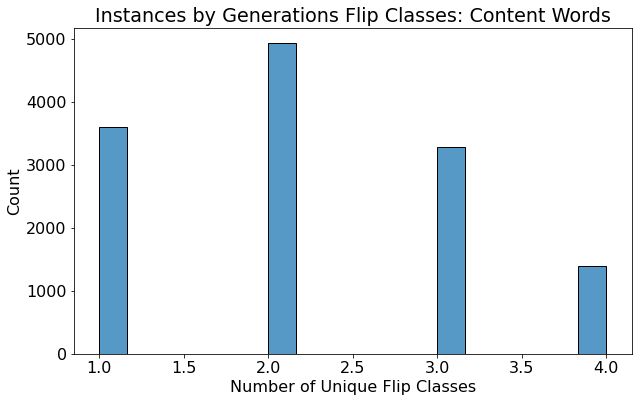

In [21]:
lens = []
for line in df['line-num'].unique():
    dt = df.loc[df['line-num'] == line]
    lens.append(len(dt['flip-class'].unique()))

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(lens)
plt.xlabel('Number of Unique Flip Classes')
plt.title('Instances by Generations Flip Classes: Content Words')
plt.savefig('test.png', dpi = 100)

## Tabulating the direction of Label Flips



In [22]:
from ast import literal_eval as make_tuple
from collections import Counter

# count of label switches in contrast set
switches = zip(df['orig-label'], df['new-label'])
switch_changes = Counter(switches)
print(switch_changes)

Counter({('neutral', 'neutral'): 56777, ('contradiction', 'contradiction'): 45888, ('entailment', 'entailment'): 45050, ('entailment', 'contradiction'): 10637, ('contradiction', 'entailment'): 10004, ('contradiction', 'neutral'): 5878, ('neutral', 'contradiction'): 5474, ('neutral', 'entailment'): 3128, ('entailment', 'neutral'): 3079})


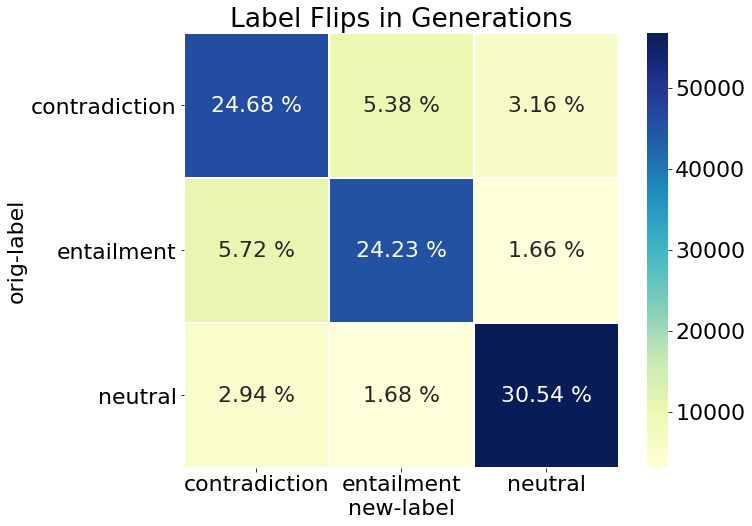

In [23]:
import matplotlib

RTE_mat = pd.crosstab(index=df['orig-label'], columns=[df['new-label']])
pcts = (round(RTE_mat/RTE_mat.sum().sum()*100, 2)).values.flatten()


matplotlib.rcParams.update({'font.size': 22})    

fig, axs = plt.subplots(figsize=(10,8))
ax = sns.heatmap(RTE_mat, annot=True, fmt = '.1f', square=1, linewidth=1., cmap="YlGnBu")


ind = 0
for t in ax.texts: 
    t.set_text(str(pcts[ind]) + " %")
    ind += 1


plt.title('Label Flips in Generations')
plt.savefig('label-flips1.png', dpi = 100)
plt.show()

In [24]:
switches = zip(df.loc[df['flip-class'] == 'Certain-Flip', 'orig-label'], df.loc[df['flip-class'] == 'Certain-Flip', 'new-label'])
switch_changes = Counter(switches)
print(switch_changes)

Counter({('entailment', 'contradiction'): 9492, ('contradiction', 'entailment'): 8375, ('neutral', 'contradiction'): 4027, ('contradiction', 'neutral'): 3431, ('neutral', 'entailment'): 1867, ('entailment', 'neutral'): 1376})


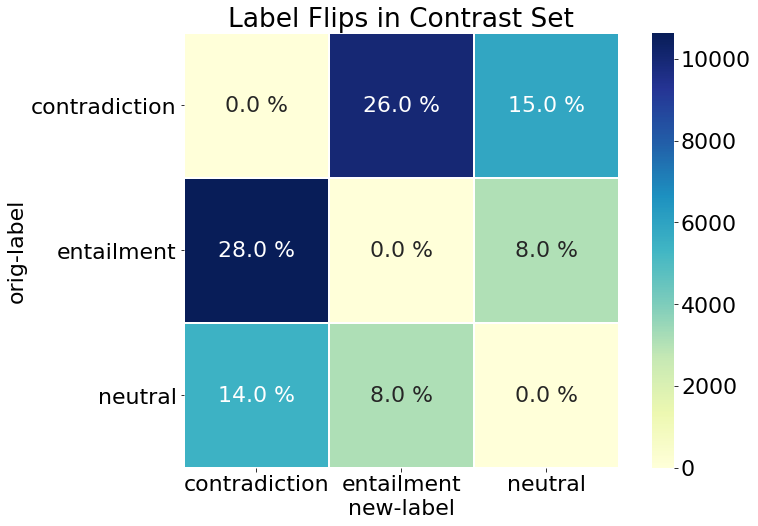

In [25]:
df = df[df['label-changed'] == 1]
RTE_mat = pd.crosstab(index=df['orig-label'], columns=[df['new-label']])
pcts = (round(RTE_mat/RTE_mat.sum().sum()*100)).values.flatten()

fig, axs = plt.subplots(figsize=(12,8))
ax = sns.heatmap(RTE_mat, annot=True, fmt = '.1f', square=1, linewidth=1., cmap="YlGnBu")

ind = 0
for t in ax.texts: 
    t.set_text(str(pcts[ind]) + " %")
    ind += 1

plt.title('Label Flips in Contrast Set')
plt.show()